In [1]:
import yfinance as yf

# Specify the ticker symbol (Tesla's ticker symbol is 'TSLA')
ticker_symbol = 'TSLA'

# Create a Ticker object for Tesla
tesla = yf.Ticker(ticker_symbol)

# Retrieve historical stock data for Tesla
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)
tesla_data.tail()

Date        Open        High         Low  \
3446 2024-03-08 00:00:00-05:00  181.500000  182.729996  174.699997   
3447 2024-03-11 00:00:00-04:00  175.449997  182.869995  174.800003   
3448 2024-03-12 00:00:00-04:00  177.770004  179.429993  172.410004   
3449 2024-03-13 00:00:00-04:00  173.050003  176.050003  169.149994   
3450 2024-03-14 00:00:00-04:00  167.770004  171.169998  160.509995   

           Close     Volume  Dividends  Stock Splits  
3446  175.339996   85315300        0.0           0.0  
3447  177.770004   85391500        0.0           0.0  
3448  177.539993   87391700        0.0           0.0  
3449  169.479996  106524500        0.0           0.0  
3450  162.500000  125998300        0.0           0.0

In [10]:
import requests
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')

In [12]:
import pandas as pd
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/tmp/ipykernel_13747/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [15]:
tesla_revenue.tail()

Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27

In [16]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."
html_data = html_data  = requests.get(url).text

In [18]:
soup = BeautifulSoup(html_data, 'html5lib')

/tmp/ipykernel_13747/3694294222.py:1: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(html_data, 'html5lib')


In [19]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [20]:
gme_revenue.tail()

Empty DataFrame
Columns: [Date, Revenue]
Index: []

[*********************100%%**********************]  1 of 1 completed


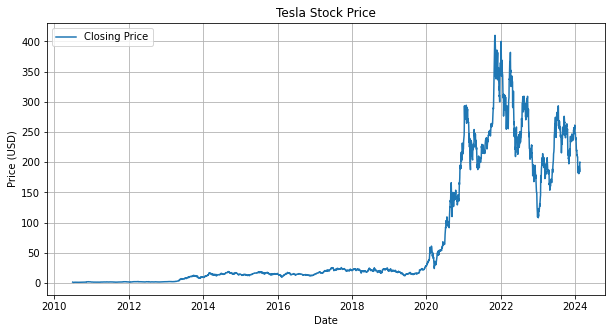

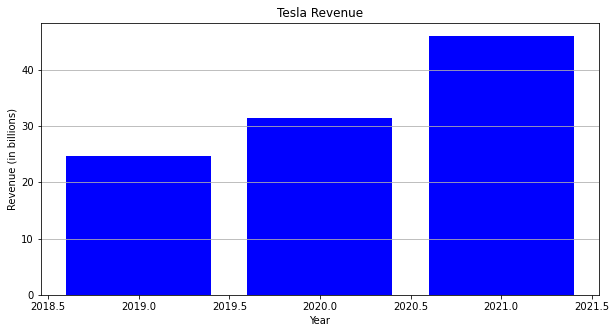

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

# Function to get Tesla stock data
def get_tesla_stock_data():
    tesla_stock_data = yf.download('TSLA')
    return tesla_stock_data

# Function to get Tesla revenue data (dummy data for demonstration)
def get_tesla_revenue_data():
    revenue_data = {'Year': [2019, 2020, 2021],
                    'Revenue (in billions)': [24.6, 31.5, 46.0]}
    return revenue_data

# Main function to generate dashboard
def generate_dashboard():
    # Get Tesla stock data
    stock_data = get_tesla_stock_data()

    # Get Tesla revenue data
    revenue_data = get_tesla_revenue_data()

    # Plot Tesla stock price
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')
    plt.title('Tesla Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)

    # Plot Tesla revenue data
    plt.figure(figsize=(10, 5))
    plt.bar(revenue_data['Year'], revenue_data['Revenue (in billions)'], color='blue')
    plt.title('Tesla Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in billions)')
    plt.grid(axis='y')

    # Show plots
    plt.show()

# Generate dashboard
generate_dashboard()


[*********************100%%**********************]  1 of 1 completed


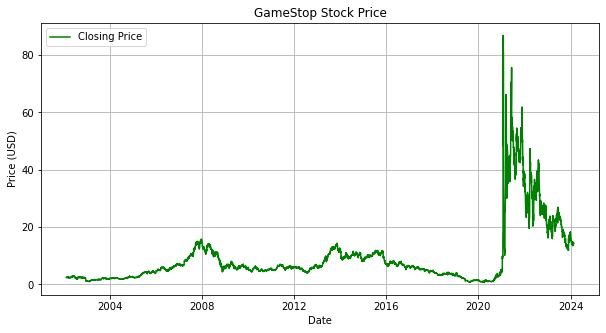

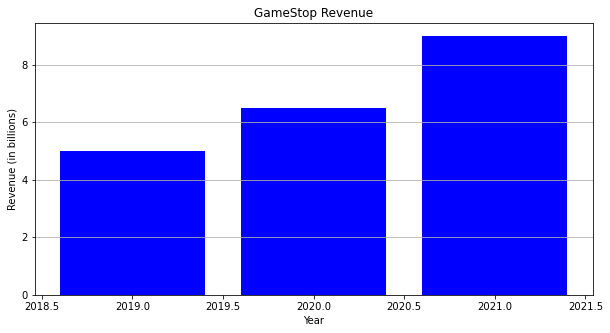

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to get GameStop stock data
def get_gamestop_stock_data():
    gme_stock_data = yf.download('GME')
    return gme_stock_data

# Function to get GameStop revenue data (dummy data for demonstration)
def get_gamestop_revenue_data():
    revenue_data = {'Year': [2019, 2020, 2021],
                    'Revenue (in billions)': [5.0, 6.5, 9.0]}
    return revenue_data

# Main function to generate dashboard
def generate_dashboard():
    # Get GameStop stock data
    stock_data = get_gamestop_stock_data()

    # Get GameStop revenue data
    revenue_data = get_gamestop_revenue_data()

    # Plot GameStop stock price
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='green')
    plt.title('GameStop Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)

    # Plot GameStop revenue data
    plt.figure(figsize=(10, 5))
    plt.bar(revenue_data['Year'], revenue_data['Revenue (in billions)'], color='blue')
    plt.title('GameStop Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue (in billions)')
    plt.grid(axis='y')

    # Show plots
    plt.show()

# Generate dashboard
generate_dashboard()
